In [2]:
#LIBRARIES
import pandas as pd  ## data manipulation
import numpy as np  ## mathematical Calculations

import seaborn as sns   ## for advance visualization
import matplotlib.pyplot as plt   ## for visualization

import scipy as sp
import os

from matplotlib import figure

## preprocessing modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  ### for scaling
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder  ### for converting categorical values in numerical
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import joblib

In [3]:
df = pd.read_csv('cleansed_anno_sessions_2.csv')
df.drop(columns=["ID", 'start', 'end', 'IP', 'Unnamed: 18'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253373 entries, 0 to 253372
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   UA_Vendor        253373 non-null  object
 1   UA_OS_name       253373 non-null  object
 2   UA_major         253373 non-null  int64 
 3   UA_minor         253373 non-null  int64 
 4   TCP_Vendor       253373 non-null  object
 5   TCP_OS_name      253373 non-null  object
 6   TCP_major        253373 non-null  int64 
 7   TCP_minor        253373 non-null  int64 
 8   Domain_Vendor    253373 non-null  object
 9   Domain_OS_name   253373 non-null  object
 10  DHCP_Vendor      253373 non-null  object
 11  DHCP_OS_name     253373 non-null  object
 12  Final_OS         253373 non-null  object
 13  Mac prefix       253373 non-null  object
 14  Device_Category  253373 non-null  object
dtypes: int64(4), object(11)
memory usage: 29.0+ MB


In [5]:
#0 value in UA Vendor Column
df[df['UA_Vendor']=='0'].value_counts().sum()

87097

In [6]:
df[df['Domain_OS_name']=='0'].value_counts().sum()

53735

In [7]:
new_df = df[(df != '0').all(axis=1)]
new_df

,UA_Vendor,UA_OS_name,UA_major,UA_minor,TCP_Vendor,TCP_OS_name,TCP_major,TCP_minor,Domain_Vendor,Domain_OS_name,DHCP_Vendor,DHCP_OS_name,Final_OS,Mac prefix,Device_Category
2,Google,Android,5,1,Google,Android,6,0,Google,Android,Google,Android,Android 5.1,98:0c:a5,Mobile Phone
5,Google,Android,4,4,Microsoft,Windows,6,1,Google,Android,Google,Android,Android 4.4,fc:64:ba,PC
6,Google,Android,6,0,Google,Android,6,0,Google,Android,Google,Android,Android 6.0,88:ad:d2,Mobile Phone
8,Google,Android,5,1,Google,Android,6,0,Google,Android,Google,Android,Android 5.1,90:21:81,Mobile Phone
9,Apple,iOS,0,0,Apple,Mac OS X,10,12,Apple,Mac OS X,Apple,iOS,Mac OS X 10.12,cc:29:f5,MAC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253364,Apple,iOS,10,0,Apple,Mac OS X,10,12,Apple,Mac OS X,Apple,iOS,Mac OS X 10.12,b8:44:d9,MAC
253365,Google,Android,5,1,Google,Android,6,0,Google,Android,Google,Android,Android 5.1,68:3e:34,Mobile Phone
253368,Google,Android,4,4,Google,Android,4,4,Google,Android,Google,Android,Android 4.4,64:a6:51,Mobile Phone
253371,Apple,Darwin,15,6,Apple,Mac OS X,10,12,Apple,Mac OS X,Apple,iOS,Mac OS X 10.12,c0:9f:42,MAC


In [8]:
#0 value in UA Vendor Column
new_df[new_df['UA_Vendor']=='0'].value_counts().sum()

0

In [9]:
#0 value in UA Vendor Column
new_df[new_df['TCP_minor']==0.0].value_counts().sum()

67109

In [10]:
new_df['TCP_minor'].mean()

3.5388812976594526

In [11]:
df_with_no_zeros = new_df[(new_df != 0.0).all(axis=1)]
df_with_no_zeros

,UA_Vendor,UA_OS_name,UA_major,UA_minor,TCP_Vendor,TCP_OS_name,TCP_major,TCP_minor,Domain_Vendor,Domain_OS_name,DHCP_Vendor,DHCP_OS_name,Final_OS,Mac prefix,Device_Category
5,Google,Android,4,4,Microsoft,Windows,6,1,Google,Android,Google,Android,Android 4.4,fc:64:ba,PC
10,Google,Android,4,4,Google,Android,4,4,Google,Android,Google,Android,Android 4.4,74:04:2b,Mobile Phone
33,Google,Android,4,4,Microsoft,Windows,6,1,Google,Android,Google,Android,Android 4.4,20:55:31,PC
36,Apple,iOS,10,3,Apple,Mac OS X,10,12,Apple,Mac OS X,Apple,iOS,Mac OS X 10.12,28:ed:6a,MAC
91,Google,Android,4,4,Microsoft,Windows,6,1,Google,Android,Google,Android,Android 4.4,64:89:9a,PC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253317,Apple,iOS,10,3,Apple,Mac OS X,10,12,Apple,Mac OS X,Apple,iOS,Mac OS X 10.12,2c:f0:a2,MAC
253323,Apple,iOS,10,2,Apple,Mac OS X,10,12,Apple,Mac OS X,Apple,iOS,Mac OS X 10.12,28:5a:eb,MAC
253356,Apple,iOS,10,3,Apple,Mac OS X,10,12,Apple,Mac OS X,Apple,iOS,Mac OS X 10.12,1c:91:48,MAC
253368,Google,Android,4,4,Google,Android,4,4,Google,Android,Google,Android,Android 4.4,64:a6:51,Mobile Phone


In [12]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['UA_major', 'UA_minor', 'TCP_major', 'TCP_minor'], dtype='object')

In [13]:
for column in numerical_columns:
    mean_value = new_df[column].mean()
    new_df[column] = new_df[column].replace(0.0, mean_value)

C:\Users\Isra\AppData\Local\Temp\ipykernel_10540\143798225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = new_df[column].replace(0.0, mean_value)


In [14]:
new_df[new_df[new_df['TCP_minor']==0.0]].value_counts().sum()

0

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113435 entries, 2 to 253372
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   UA_Vendor        113435 non-null  object 
 1   UA_OS_name       113435 non-null  object 
 2   UA_major         113435 non-null  float64
 3   UA_minor         113435 non-null  float64
 4   TCP_Vendor       113435 non-null  object 
 5   TCP_OS_name      113435 non-null  object 
 6   TCP_major        113435 non-null  int64  
 7   TCP_minor        113435 non-null  float64
 8   Domain_Vendor    113435 non-null  object 
 9   Domain_OS_name   113435 non-null  object 
 10  DHCP_Vendor      113435 non-null  object 
 11  DHCP_OS_name     113435 non-null  object 
 12  Final_OS         113435 non-null  object 
 13  Mac prefix       113435 non-null  object 
 14  Device_Category  113435 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 13.8+ MB


In [16]:
categorical_columns = new_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['UA_Vendor', 'UA_OS_name', 'TCP_Vendor', 'TCP_OS_name', 'Domain_Vendor',
       'Domain_OS_name', 'DHCP_Vendor', 'DHCP_OS_name', 'Final_OS',
       'Mac prefix', 'Device_Category'],
      dtype='object')

In [17]:
new_df['Device_Category'].value_counts()

Device_Category
Mobile Phone    66085
MAC             31926
PC              15424
Name: count, dtype: int64

In [18]:
new_df['TCP_OS_name'].value_counts()

TCP_OS_name
Android     66085
Mac OS X    31926
Windows     15424
Name: count, dtype: int64

<Axes: xlabel='Device_Category', ylabel='count'>

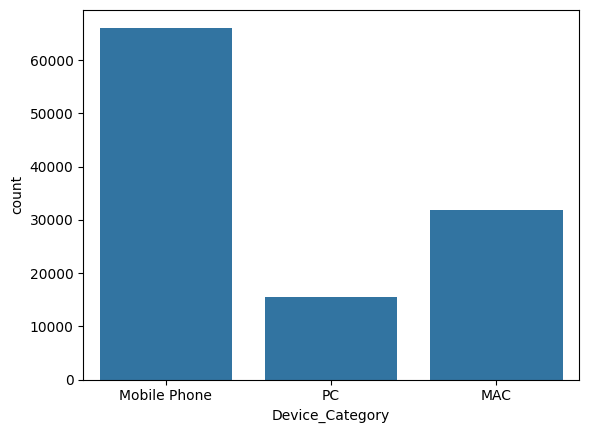

In [19]:
sns.countplot(x=new_df['Device_Category'], data=new_df)


In [20]:
for column in categorical_columns:
    le = LabelEncoder()
    new_df[column] = le.fit_transform(new_df[column])

C:\Users\Isra\AppData\Local\Temp\ipykernel_10540\1262030906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = le.fit_transform(new_df[column])
C:\Users\Isra\AppData\Local\Temp\ipykernel_10540\1262030906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column] = le.fit_transform(new_df[column])
C:\Users\Isra\AppData\Local\Temp\ipykernel_10540\1262030906.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [21]:
new_df

,UA_Vendor,UA_OS_name,UA_major,UA_minor,TCP_Vendor,TCP_OS_name,TCP_major,TCP_minor,Domain_Vendor,Domain_OS_name,DHCP_Vendor,DHCP_OS_name,Final_OS,Mac prefix,Device_Category
2,1,0,5.000000,1.000000,1,0,6,3.538881,1,0,1,0,23,756,1
5,1,0,4.000000,4.000000,2,2,6,1.000000,1,0,1,0,21,1197,2
6,1,0,6.000000,1.036867,1,0,6,3.538881,1,0,1,0,25,699,1
8,1,0,5.000000,1.000000,1,0,6,3.538881,1,0,1,0,23,725,1
9,0,6,5.376947,1.036867,0,1,10,12.000000,0,2,0,4,54,992,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253364,0,6,10.000000,1.036867,0,1,10,12.000000,0,2,0,4,54,901,0
253365,1,0,5.000000,1.000000,1,0,6,3.538881,1,0,1,0,23,528,1
253368,1,0,4.000000,4.000000,1,0,4,4.000000,1,0,1,0,21,517,1
253371,0,2,15.000000,6.000000,0,1,10,12.000000,0,2,0,4,54,946,0


In [22]:
y = new_df['Device_Category']
x = new_df.drop(columns=['Device_Category'], inplace = False)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

SVM

In [24]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [25]:
y_pred_svm = svm.predict(x_test)

In [26]:
print("Accuracy:", accuracy_score(y_pred_svm,y_test)*100)

Accuracy: 85.73632476748799


Random Forest

In [27]:
# Create the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred1 = model.predict(x_test)
score = accuracy_score(y_test, y_pred1) # actual answer was Y_test and calculated answer was y_pred. we compare both for accuracy
accuracy = score*100
print('Accuracy :',accuracy)

Accuracy : 100.0


Confusion Matrix
[[ 6385     0     0]
 [    0 13217     0]
 [    0     0  3085]]


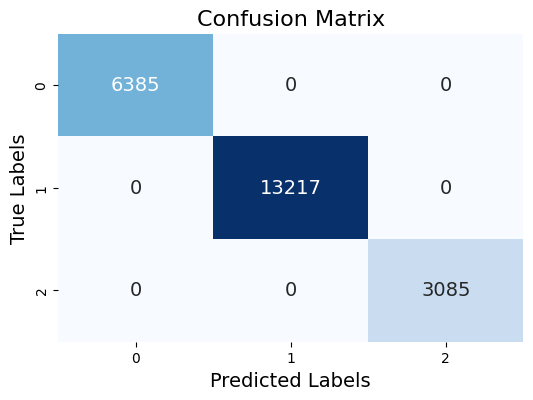

In [29]:
from sklearn.metrics import confusion_matrix

# PRINT THE CONFUSION MATRIX
print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred1)
print(cm)
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, annot_kws = {'size' : 14})
plt.xlabel('Predicted Labels', fontsize = 14)
plt.ylabel('True Labels', fontsize = 14)
plt.title('Confusion Matrix', fontsize =16)
plt.show()


Logistic Regression

In [30]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)


c:\Users\Isra\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred2 = model1.predict(x_test)
score = accuracy_score(y_test, y_pred2) # actual answer was Y_test and calculated answer was y_pred. we compare both for accuracy
accuracy = score*100
print("Accuracy:",accuracy)

Accuracy: 99.91625159783136


In [33]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6385
           1       0.82      1.00      0.90     13217
           2       0.00      0.00      0.00      3085

    accuracy                           0.86     22687
   macro avg       0.59      0.66      0.62     22687
weighted avg       0.74      0.86      0.80     22687

Confusion Matrix:
[[ 6234   151     0]
 [    0 13217     0]
 [  399  2686     0]]


c:\Users\Isra\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Isra\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Isra\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [34]:
file_path = "svm_model.pkl"
joblib.dump(svm, file_path)

['svm_model.pkl']